<a href="https://colab.research.google.com/github/ESSI-Lab/dab-py/blob/main/dab-py_demo_whos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Jupyter notebook showing programmatically discovery and access of WHOS data**

This notebook is used to programmatically access WHOS DAB functionalities, in this case through the OGC OM-JSON based API, documented and available for tests also here: https://whos.geodab.eu/gs-service/om-api

The WHOS portal can also be used to help debug your python notebook: https://whos.geodab.eu/gs-service/whos/search.html

## **Step 1: Install dab-py**

The Python client library `dab-py` is available on PyPI and GitHub: https://github.com/ESSI-Lab/dab-py

In [5]:
!pip install --upgrade dab-py

## **Step 2: Main Code Tutorial**

### **2.1: Import Library**
Import the main `dabpy` library to access WHOS API `om_api` functionalities.

In [6]:
from dabpy import WHOSClient, Constraints
from IPython.display import display
from google.colab import userdata

### **2.2: Initialize WHOS Client (Token & View)**
Replace with your WHOS API token and optional view. This initializes the client to interact with the WHOS API.

As a prerequisite to obtain programmatically access to WHOS, a token is required. It can be obtained after registration at https://whos.geodab.eu/gs-service/whos/registration.html.

In [8]:
# Replace with your WHOS API token and optional view
token = userdata.get('token-whos')  # replace with your actual token
view = "whos"
client = WHOSClient(token=token, view=view)

### **2.3: Define Feature Constraints**
Feature retrieval in the WHOS API can be restricted using optional constraints.

#### 2.3.1: Default: Spatial Constraints *(bounding box)*  
Set the geographic bounding box for spatial queries. The example uses a region in Finland.

In [9]:
# Define bounding box coordinates (south, west, north, east)
south = 60.398
west = 22.149
north = 60.690
east = 22.730

In this example, only spatial constraints (bounding box) are applied, while the other filters remain optional.

In [10]:
# Create feature constraints
constraints = Constraints(bbox = (south, west, north, east))

#### 2.3.2: Optional: Other Constraints
Additional optional constraints can be applied to further filter the results:
- **Observed property** : filter features based on the type of measurement or variable, such as water level, precipitation, discharge, etc.
- **Ontology** : specify which ontology to use to expand the observed property search term or URI with synonyms and related narrower concepts. Two ontologies are available: `whos` and `his-central`.
- **Country**: using Country code (ISO3).
- **Provider**: data provider identifier.
- The other constraints are listed from the documented API https://whos.geodab.eu/gs-service/om-api/

If optional constraints are specified, update the code with detail constraints:

In [11]:
# You can also specify additional constraints as needed, for example:
'''
constraints = Constraints(
    bbox = (south, west, north, east),
    observedProperty = "example_property",
    ontology = "example_ontology",
    country = "example_country",
    provider = "example_provider",
    spatialRelation = "example_spatial_relation",
    feature = "example_feature_id",  #can also use features[index_number].id directly
    localFeatureIdentifier = "example_local_id",
    observationIdentifier = "example_obs_id",
    beginPosition = "2025-01-01T00:00:00Z",
    endPosition = "2025-02-01T00:00:00Z",
    predefinedLayer = "example_layer",
    timeInterpolation = "example_interpolation",
    intendedObservationSpacing = "PT1H",  # ISO 8601 duration, e.g., 1 hour
    aggregationDuration = "P1D"  # ISO 8601 duration, e.g., 1 day
)
'''

'\nconstraints = Constraints(\n    bbox = (south, west, north, east),\n    observedProperty = "example_property",\n    ontology = "example_ontology",\n    country = "example_country",\n    provider = "example_provider",\n    spatialRelation = "example_spatial_relation",\n    feature = "example_feature_id",  #can also use features[index_number].id directly\n    localFeatureIdentifier = "example_local_id",\n    observationIdentifier = "example_obs_id",\n    beginPosition = "2025-01-01T00:00:00Z",\n    endPosition = "2025-02-01T00:00:00Z",\n    predefinedLayer = "example_layer",\n    timeInterpolation = "example_interpolation",\n    intendedObservationSpacing = "PT1H",  # ISO 8601 duration, e.g., 1 hour\n    aggregationDuration = "P1D"  # ISO 8601 duration, e.g., 1 day\n)\n'

### **2.4: Get `Features`**

#### 2.4.1: Retrieve features as Python objects
Fetch features from the WHOS API URL as Python `Feature` objects using the previously defined constraints.

In [12]:
# 01.1.1: Get Features as Python objects
features = client.get_features(constraints)

Retrieving page 1: https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/features?west=22.149&south=60.398&east=22.73&north=60.69
Returned first 10 features (not completed, more data available).
Use class.next() to move to the next page.


The retrieved **features** are stored in a `FeaturesCollection`.  
Then convert the current page to a Pandas DataFrame for easier inspection and analysis.then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [13]:
# 01.1.2: (optional: Convert Features to DataFrame if needed)
features_df = features.to_df()
display(features_df)

,ID,Name,Coordinates,Source,Identifier,Contact Name,Contact Email
0,21983EA29AD14AC83B7272E3F7B4A33B0CB3F552,Hyppöistenkoski,"22.229236227547663, 60.43304266160308","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:28700,,
1,2B14A8147C910F8066585B7DBC18D20B2E162065,"Aurajoki,Halinen W 28:7","22.307491557098153, 60.46350214826706","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:28011,,
2,31448B1B7B67AD32B4F450CB6C217B7AA079D50C,Paimion Vähäjoki,"22.68391584070042, 60.46148465783341","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2701400,,
3,43E51FC4B853651249325A397772A76C84B29562,Halinen,"22.306112954684853, 60.464343948718316","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2800700,,
4,62FDE91BC4D3DA0D47CDEEE94410637A4D4BEDAB,Turku,"22.245873907383928, 60.48609491030999","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:1280002,,
5,6340FDE8B9906CFB3B065B150A6A3AF89F47E8B5,"Ruskojoki, Merttilän allas","22.244235368959565, 60.568291625269836","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:8200800,,
6,8CF96F7D40071DA7876A6A4887895C6D860F8D5F,HALINEN,"22.30611591, 60.46434362",GRDC open,https://portal.grdc.bafg.de/KiWIS/KiWIS/1583626,,
7,911C0D0DBCD67D91040612D800CC9E8A3607FF45,Hintsan-Lähteenmäen allas,"22.191384123263735, 60.49976190149986","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:8200700,,
8,92BF791D616E6C8BB8A28E292C0B8E618B498219,Paimionjoki - Aurajoki,"22.67717765096955, 60.563709279270064","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2700370,,
9,9413350CE1DF751D17223F864EC4C9FA33BBC64E,"Hypöistenkoski, Aura","22.59757716599028, 60.651063911497864","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2800300,,


#### 2.4.2: (If needed / more data exists) Fetch the next page
If the dataset is **not completed** (contains more than 10 datas) - like the above data, fetch the next page using `.next()`

In [14]:
# 01.2.1: Fetch next page (if available).
nextFeatures = features.next()

# 01.2.2: (optional) Convert current page features to DataFrame.
nextFeatures_df = nextFeatures.to_df()
display(nextFeatures_df)

Retrieving page 2: https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/features?west=22.149&south=60.398&east=22.73&north=60.69&resumptionToken=9413350CE1DF751D17223F864EC4C9FA33BBC64E
Returned next 3 features (completed, data finished).


,ID,Name,Coordinates,Source,Identifier,Contact Name,Contact Email
0,AB595D4F96AF7FE4D038CBC56026A4E11A11762D,Juntola,"22.702744052828233, 60.53970953727093","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2700350,,
1,CC013CD174446E47ADB6BDD9367937A73B9FFFAD,Halistenkoski,"22.28659278577028, 60.46555174839114","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:28800,,
2,D26A6794AE4F751E4EBD957AE6480BE0ACF6D584,Paattistenjoki mittapato,"22.34401502173431, 60.535675017326156","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2801000,,


### **2.5: Get `Observations`**

#### 2.5.1: Retrieve observations as Python objects (using previous constraints)

In this part, the constraints are automatically inherited from Step 2.3, the same as those used for `GET Features`.

If the dataset is not completed (contains more than 10 datas), fetch the next page using `.next()` *(see Step 2.4.2)*.

In [15]:
# 02.1.1: Retrieve observations matching the previously defined constraints (only bbox).
observations = client.get_observations(constraints)

Retrieving page 1: https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/observations?west=22.149&south=60.398&east=22.73&north=60.69
Returned first 10 observations (not completed, more data available).
Use class.next() to move to the next page.


The retrieved **observations** are then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [16]:
# 02.1.2: (optional: Convert Observations to DataFrame if needed)
observations_df = observations.to_df()
display(observations_df)

,ID,Source,Observed Property,Phenomenon Time Begin,Phenomenon Time End
0,urn:uuid:0e911d70-1487-44cf-8973-20bc51b51d4c,"Finland, Finnish Environment Insitute (SYKE)",LumiAlue,1961-03-01T00:00:00Z,1980-04-01T00:00:00Z
1,urn:uuid:2d3e4085-6fc4-4b67-85b9-c3cf53b8ab27,"Finland, Finnish Environment Insitute (SYKE)",SadantaAlue,1961-01-01T00:00:00Z,1981-12-01T00:00:00Z
2,urn:uuid:4c9444fa-c03c-4313-b2a9-cbaa1a35b9f6,"Finland, Finnish Environment Insitute (SYKE)",Jaanpaksuus,1991-01-10T00:00:00Z,1993-03-22T00:00:00Z
3,urn:uuid:154d0301-e5c6-409e-a3f9-a2a9d1f1fc07,"Finland, Finnish Environment Insitute (SYKE)",Virtaama,2020-01-24T00:00:00Z,2023-09-05T00:00:00Z
4,urn:uuid:e88ca65d-baf9-4e9a-b627-8c588b278459,"Finland, Finnish Environment Insitute (SYKE)",Vedenkorkeus,2020-01-22T00:00:00Z,2026-01-12T09:31:00Z
5,urn:uuid:61466938-4930-424c-a161-0a8e568fab34,"Finland, Finnish Environment Insitute (SYKE)",Vedenkorkeus,1961-01-01T00:00:00Z,2026-01-12T09:31:00Z
6,urn:uuid:800f7181-44ae-483a-ac92-ce0120e7587e,"Finland, Finnish Environment Insitute (SYKE)",LampoPintavesi,1983-01-01T00:00:00Z,1985-01-31T00:00:00Z
7,urn:uuid:ff4e00b8-0442-44ff-ace7-b7b754ec680d,"Finland, Finnish Environment Insitute (SYKE)",Virtaama,1938-01-01T00:00:00Z,2026-01-12T09:31:00Z
8,urn:uuid:f47625bf-db99-4763-bb3e-3439df2b1a18,"Finland, Finnish Environment Insitute (SYKE)",LumiPiste,1978-01-16T00:00:00Z,2023-02-22T00:00:00Z
9,urn:uuid:700e5212-1d20-432f-841f-86c27dd477a9,"Finland, Finnish Environment Insitute (SYKE)",Vedenkorkeus,1999-01-01T00:00:00Z,2007-05-31T00:00:00Z


#### 2.5.2: Retrieve observations as Python objects (using new constraints)

Define a new set of constraints (`new_constraints`) to retrieve observations.  
In this example, retrieve observations for a specific feature (station).
There are two ways to specify the feature ID:
  1. Directly provide the ID as a string, e.g.:  
     ```python
     feature="9413350CE1DF751D17223F864EC4C9FA33BBC64E"
     ```
  2. Extract the ID from a previously retrieved features list, e.g.:   
     ```python
     feature=features[9].id
     ```
     - `features[9]` → selects the 10th feature (station) in the list (index 9)  
     - `.id` → accesses its unique identifier, required by the API

In [17]:
# 02.2.1: (or) retrieve observations from a different constraints - by defining new_constraints.
new_constraints = Constraints(feature=features[9].id)
observations_new_constraints = client.get_observations(new_constraints)

Retrieving page 1: https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/observations?feature=9413350CE1DF751D17223F864EC4C9FA33BBC64E
Returned first 2 observations (completed, data finished).


The retrieved **observations** are then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [18]:
# 02.2.2: (optional: Convert Observations to DataFrame if needed)
observations_new_constraints_df = observations_new_constraints.to_df()
display(observations_new_constraints_df)

,ID,Source,Observed Property,Phenomenon Time Begin,Phenomenon Time End
0,urn:uuid:abd64de5-97ed-4840-91a0-2b75b017510c,"Finland, Finnish Environment Insitute (SYKE)",Vedenkorkeus,1943-07-01T00:00:00Z,2026-01-12T09:31:07Z
1,urn:uuid:a8d5c50f-59a3-417c-81c1-24cd59121584,"Finland, Finnish Environment Insitute (SYKE)",Virtaama,1943-07-01T00:00:00Z,2026-01-12T09:31:07Z


### **2.6: Get the Data Points**
#### 2.6.1: Retrieve Observation With Data Points

Retrieve the full time-series data for a selected observation within a specified time range. It shows the actual code that retrieves the data, to separate the action (API call) from what to do next with the data.

In [19]:
# 03.1: Get first observation with data points
obs_with_data = client.get_observation_with_data(observations_new_constraints[0].id, begin="2025-01-01T00:00:00Z", end="2025-02-01T00:00:00Z")

Retrieving https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/observations?includeData=true&observationIdentifier=urn%3Auuid%3Aabd64de5-97ed-4840-91a0-2b75b017510c&beginPosition=2025-01-01T00%3A00%3A00Z&endPosition=2025-02-01T00%3A00%3A00Z


#### 2.6.2: (optional) Convert to DataFrame for analysis

The returned data can be plotted or further analyzed as needed.

In [20]:
# 03.2: (optional: Convert Observation Points to DataFrame if needed)
obs_points_df = client.points_to_df(obs_with_data)
display(obs_points_df)

,Time,Value
0,2025-02-01T00:00:00Z,111
1,2025-01-31T00:00:00Z,134
2,2025-01-30T00:00:00Z,168
3,2025-01-29T00:00:00Z,127
4,2025-01-28T00:00:00Z,102
5,2025-01-27T00:00:00Z,112
6,2025-01-26T00:00:00Z,118
7,2025-01-25T00:00:00Z,86
8,2025-01-24T00:00:00Z,75
9,2025-01-23T00:00:00Z,74


#### 2.6.3: (Optional) Example of Graphical Time-Series
This step demonstrates visualization, which is a different action from simply retrieving or tabulating data.  

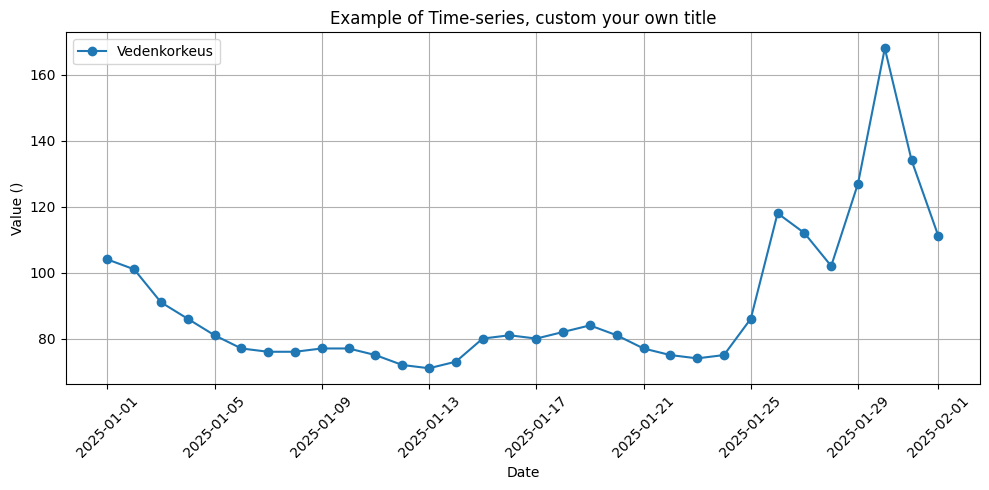

In [21]:
# 03.3: (optional: Example of Graphical Time-Series)
client.plot_observation(obs_with_data, "Example of Time-series, custom your own title")

## **Step 3: Full Code**

This part contains the complete working example from steps 2.1–2.6.

It can be run as a single block to reproduce all results.

```python
from dabpy import *
from IPython.display import display

# Replace with your WHOS API token and optional view
token = "my-token"  # replace with your actual token
view = "whos"
client = WHOSClient(token=token, view=view)


## 00 DEFINE FEATURE CONSTRAINTS
# Define bounding box coordinates (south, west, north, east), example of Finland.
south = 60.398
west = 22.149
north = 60.690
east = 22.730
# Create feature constraints, only spatial constraints are applied, while the other filters remain optional.
constraints = Constraints(bbox = (south, west, north, east))


## 01 GET FEATURES
# 01.1.1: Retrieve features matching the previously defined constraints (only bbox).
features = client.get_features(constraints)
# 01.1.2: (optional: Convert Features to DataFrame if needed).
features_df = features.to_df()
display(features_df)

'''
--- Use next() only to fetch all the pages ---
# 01.2.1: # Fetch next page (if available).
nextFeatures = features.next()
# 01.2.2: (optional) Convert current page features to DataFrame.
nextFeatures_df = nextFeatures.to_df()   
display(nextFeatures_df)
'''

## 02 GET OBSERVATIONS
# 02.1.1: Retrieve observations matching the previously defined constraints (only bbox).
observations = client.get_observations(constraints)

# 02.1.2: (optional: Convert Observations to DataFrame if needed)
observations_df = observations.to_df()
display(observations_df)

# 02.2.1: (or) retrieve observations from a different constraints - by defining new_constraints.
new_constraints = Constraints(feature=features[9].id)
observations_new_constraints = client.get_observations(new_constraints)

# 02.2.2: (optional: Convert Observations to DataFrame if needed)
observations_new_constraints_df = observations_new_constraints.to_df()
display(observations_new_constraints_df)


## 03 GET DATA POINTS
# 03.1: Get first observation with data points
obs_with_data = client.get_observation_with_data(observations_new_constraints[0].id, begin="2025-01-01T00:00:00Z", end="2025-02-01T00:00:00Z")
# 03.2: (optional: Convert Observation Points to DataFrame if needed)
obs_points_df = client.points_to_df(obs_with_data)
display(obs_points_df)
# 03.3: (optional: Example of Graphical Time-Series)
client.plot_observation(obs_with_data, "Example of Time-series, custom your own title")